In [9]:
from glucose_dataset import GlucoseDataset
import torch

ds = GlucoseDataset("datasets/diabetes_datasets.zip", sub_directory="Shanghai_T1DM")

(0.0, 24.0)

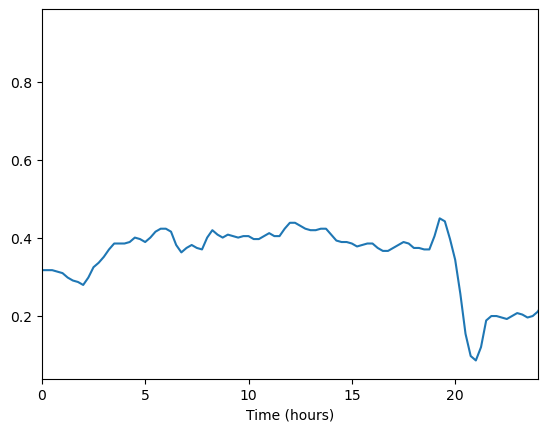

In [15]:
import matplotlib.pyplot as plt
sample_data = ds.__getitem__(0)
time = torch.arange(0, len(sample_data)) * 0.25 # Samples on 15 minute intervals
plt.figure()
plt.plot(time, sample_data)
plt.xlabel("Time (hours)")
plt.xlim(0, 24)